# Analise de notas dos alunos da UFRN

## 1. Introdução

O objetivo desse *notebook* é realizar uma série de correlações sobre as turmas ofertadas pelo Instituto Metrópole Digital (IMD), departamento da Universidade Federal do Rio Grande do Norte (UFRN), para avaliar se o horário dessas turmas tem algum efeito no sucesso ou insucesso do aluno, se o professor também tem algum peso nessas chances e etc.

Para isso foram escolhidas algumas das disciplinas com maior porcentagem de insucesso são elas: Fundamentos Matemáticos da Computação I (FMCI), Fundamentos Matemáticos da Computação II (FMCII), Cálculo I além da disciplina deste projeto Probabilidade. Todos os dados utilizados para análise foram retirados do banco de dados público da UFRN no *website* http://dados.ufrn.br.  

## 2 Recursos utilizados

Na análise dos dados serão utilizados as seguintes bibliotecas *python* o *Pandas* para a criação e manipulção dos *dataframes*, *Numpy* para a análise matemática e o *Bokeh* para a visualização dos dados.

## 3 Preparação do Ambiente e Criação dos Dataframes

Antes de começarmos é necessário preparar o *notebook*, instalado as bibliotecas já citadas rodando o seguinte comando, e realizar a criação dos dados e subsequentemente manipulá-los para facilitar a sua análise. Todo o processo de manipulção está descrito em forma de commentários nos códigos.

In [1]:
!pip install pandas
!pip install numpy
!pip install bokeh

notebook 5.4.0 requires terminado>=0.8.1, which is not installed.


notebook 5.4.0 requires terminado>=0.8.1, which is not installed.


notebook 5.4.0 requires terminado>=0.8.1, which is not installed.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [3]:
url_componentes_curriculares = 'http://dados.ufrn.br/dataset/3fea67e8-6916-4ed0-aaa6-9a8ca06a9bdc/resource/9a3521d2-4bc5-4fda-93f0-f701c8a20727/download/componentes-curriculares-presenciais.csv'

url_cursos_ufrn = 'http://dados.ufrn.br/dataset/08b0dc59-faa9-4281-bd1e-2a39f532489e/resource/949be3d1-e85b-4d0f-9f60-1d9a7484bb06/download/cursos-ufrn'

url_matriculas_2015_1 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/9e7ba1c2-f92d-4b9c-9e91-3b026ecdf913/download/matriculas-de-2015.1.csv'
url_matriculas_2015_2 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/baa6c8b4-2072-417f-b238-c028ccc8c14b/download/matriculas-de-2015.2.csv'
url_matriculas_2016_1 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/4778d3ce-8898-46a8-a623-ee6a480a2980/download/matriculas-de-2016.1.csv'
url_matriculas_2016_2 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/f6179838-b619-4d7d-af9c-18c438b80dd4/download/matriculas-de-2016.2.csv'
url_matriculas_2017_1 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/79071c21-e32c-438f-b930-d1b6ccc02ec2/download/matricula-componente-20171'
url_matriculas_2017_2 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/55dfe713-ff7c-4fa8-8d1d-d4294a025bff/download/matricula-componente-20172'

url_turmas_2015_1 = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/4d5aee5a-00b0-4ed6-a4be-59fa77a56797/download/turmas-2015.1.csv'
url_turmas_2015_2 = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/7c59621c-4a8b-49d4-b319-83cfea9bdf28/download/turmas-2015.2.csv'
url_turmas_2016_1 = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/322d9977-ba15-47f1-8216-75a1ca78e197/download/turmas-2016.1.csv'
url_turmas_2016_2 = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/5e8e3228-7f22-40a2-9efd-561c44844567/download/turmas-2016.2.csv'
url_turmas_2017_1 = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/5e77d066-d506-45eb-a21e-76aa79616fef/download/turmas-2017.1.csv'
url_turmas_2017_2 = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/01fe7343-fdf0-4a67-b915-2386b7c2fecb/download/turmas-2017.2.csv'

docentes_url = 'http://dados.ufrn.br/dataset/8bf1a468-48ff-4f4d-95ee-b17b7a3a5592/resource/ff0a457e-76fa-4aca-ad99-48aebd7db070/download/docentes.csv'

In [4]:
# Leitura dos csvs docentes, componentes, matriculas e cursos.

docentes = pd.read_csv(docentes_url, sep=';')

cursos_ufrn = pd.read_csv(url_cursos_ufrn, sep=';', error_bad_lines=False)

componente = pd.read_csv(url_componentes_curriculares, sep=';'
                         , usecols=["id_componente","codigo","nivel","nome","unidade_responsavel"])

matriculas_2015_1 = pd.read_csv(url_matriculas_2015_1, sep=';')
matriculas_2015_2 = pd.read_csv(url_matriculas_2015_2, sep=';')
matriculas_2016_1 = pd.read_csv(url_matriculas_2016_1, sep=';')
matriculas_2016_2 = pd.read_csv(url_matriculas_2016_2, sep=';')
matriculas_2017_1 = pd.read_csv(url_matriculas_2017_1, sep=';')
matriculas_2017_2 = pd.read_csv(url_matriculas_2017_2, sep=';')

In [5]:
# Leitura dos csvs das turmas.

turmas_2015_1 = pd.read_csv(url_turmas_2015_1, sep=';')
turmas_2015_2 = pd.read_csv(url_turmas_2015_2, sep=';')
turmas_2016_1 = pd.read_csv(url_turmas_2016_1, sep=';') 
turmas_2016_2 = pd.read_csv(url_turmas_2016_2, sep=';')
turmas_2017_1 = pd.read_csv(url_turmas_2017_1, sep=';')
turmas_2017_2 = pd.read_csv(url_turmas_2017_2, sep=';')

turmas_2015_1.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2015_2.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2016_1.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2016_2.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2017_1.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2017_2.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)

turmas_2015_1.id_componente = turmas_2015_1.id_componente.astype(str)
turmas_2015_2.id_componente = turmas_2015_2.id_componente.astype(str)
turmas_2016_1.id_componente = turmas_2016_1.id_componente.astype(str)
turmas_2016_2.id_componente = turmas_2016_2.id_componente.astype(str)
turmas_2017_1.id_componente = turmas_2017_1.id_componente.astype(str)
turmas_2017_2.id_componente = turmas_2017_2.id_componente.astype(str)

# Adicionando 

turmas_2015_1['ano_semestre'] = '2015_1'
turmas_2015_2['ano_semestre'] = '2015_2'
turmas_2016_1['ano_semestre'] = '2016_1'
turmas_2016_2['ano_semestre'] = '2016_2'
turmas_2017_1['ano_semestre'] = '2017_1'
turmas_2017_2['ano_semestre'] = '2017_2'

In [6]:
# Retirando a coluna Unnamed: 10 de alguns csvs

matriculas_2015_1.drop('Unnamed: 10', 1, inplace=True) 
matriculas_2015_2.drop('Unnamed: 10', 1, inplace=True) 
matriculas_2016_1.drop('Unnamed: 10', 1, inplace=True) 
matriculas_2016_2.drop('Unnamed: 10', 1, inplace=True) 

# Criando coluna ano_semestre

matriculas_2015_1['ano_semestre'] = '2015_1'
matriculas_2015_2['ano_semestre'] = '2015_2'
matriculas_2016_1['ano_semestre'] = '2016_1'
matriculas_2016_2['ano_semestre'] = '2016_2'
matriculas_2017_1['ano_semestre'] = '2017_1'
matriculas_2017_2['ano_semestre'] = '2017_2'

In [7]:
# Combinando dataframes das matrículas.

frames = [matriculas_2015_1, matriculas_2015_2, matriculas_2016_1, matriculas_2016_2, matriculas_2017_1, matriculas_2017_2]
matriculas = pd.concat(frames)

# Combinando os dataframes das turmas.

frames  = [turmas_2015_1, turmas_2015_2, turmas_2016_1, turmas_2016_2, turmas_2017_1, turmas_2017_2]
turmas = pd.concat(frames)

In [8]:
# Limpando dados inválidos/desconhecidos da descrição.

matriculas = matriculas[matriculas.descricao != 'DESISTENCIA']
matriculas = matriculas[matriculas.descricao != 'CANCELADO']
matriculas = matriculas[matriculas.descricao != 'INDEFERIDO']
matriculas = matriculas[matriculas.descricao != 'EXCLUIDA']
matriculas = matriculas[matriculas.descricao != 'DISPENSADO']
matriculas = matriculas[matriculas.descricao != 'CUMPRIU']
matriculas = matriculas[matriculas.descricao != 'EM ESPERA']
matriculas = matriculas[matriculas.descricao != 'AGUARDANDO DEFERIMENTO']
matriculas = matriculas[matriculas.descricao != 'TRANSFERIDO']
matriculas = matriculas[matriculas.descricao != 'INCORPORADO']

In [9]:
# Limpando dados inválidos/desconhecidos da descrição.

matriculas = matriculas[matriculas.descricao != 'DESISTENCIA']
matriculas = matriculas[matriculas.descricao != 'CANCELADO']
matriculas = matriculas[matriculas.descricao != 'INDEFERIDO']
matriculas = matriculas[matriculas.descricao != 'EXCLUIDA']
matriculas = matriculas[matriculas.descricao != 'DISPENSADO']
matriculas = matriculas[matriculas.descricao != 'CUMPRIU']
matriculas = matriculas[matriculas.descricao != 'EM ESPERA']
matriculas = matriculas[matriculas.descricao != 'AGUARDANDO DEFERIMENTO']
matriculas = matriculas[matriculas.descricao != 'TRANSFERIDO']
matriculas = matriculas[matriculas.descricao != 'INCORPORADO']

In [10]:
# Gerando dataframe com as turmas e componentes.

colunas = ["id_turma","id_docente_interno","codigo","nivel_ensino","nome","unidade_responsavel",
          "situacao_turma","capacidade_aluno","descricao_horario", "ano_semestre"]
merge_turmas_componentes = pd.merge(turmas, componente, on='id_componente')[colunas]

merge_turmas_componentes.dropna(inplace=True)


In [11]:
# Filtrando para os componentes do IMD

componentes_imd = merge_turmas_componentes[merge_turmas_componentes.codigo.str.contains('IMD')]

componentes_imd = componentes_imd[componentes_imd.situacao_turma == 'CONSOLIDADA']

# Alterando o nome da coluna id_docente_interno para id_servidor (mesma do dataframe docentes).

componentes_imd.rename(columns={'id_docente_interno': 'id_servidor'}, inplace=True)
componentes_imd.capacidade_aluno = componentes_imd.capacidade_aluno.astype(np.int64)
componentes_imd.id_servidor = componentes_imd.id_servidor.astype(np.int64)


In [12]:
# Merge dos dataframes componentes_imd e docentes, para amarrar os nomes dos docentes as turmas.

colunas = ["id_turma", "codigo", "nivel_ensino", "nome_y", "codigo", "nivel_ensino",
          "nome_x","capacidade_aluno", "descricao_horario", "ano_semestre"]

turmas_imd = pd.merge(componentes_imd, docentes, on="id_servidor")[colunas]
turmas_imd.id_turma = turmas_imd.id_turma.astype(np.int64)
turmas_imd.drop('ano_semestre', axis=1, inplace=True)



In [13]:
# Merge dos dataframes matriculas e turmas_imd.

matriculas.id_turma = matriculas.id_turma.astype(np.int64)
colunas = ["id_turma", "discente", "codigo", "nome_y", "nome_x", "descricao_horario", "unidade", "nota", "reposicao"
           , "media_final", "numero_total_faltas", "descricao", "ano_semestre"]

merge_matriculas_turmas_imd = pd.merge(matriculas, turmas_imd, on="id_turma")[colunas]

In [14]:
merge_matriculas_turmas_imd.head()

,id_turma,discente,codigo,codigo,nome_y,nome_x,descricao_horario,unidade,nota,reposicao,media_final,numero_total_faltas,descricao,ano_semestre
0,1239422,bcd9e4d861acc00fac216bbe953c63b8,IMD0040,IMD0040,CARLOS EDUARDO DA SILVA,LINGUAGEM DE PROGRAMAÇÃO II,24N12 (02/02/2015 - 20/06/2015),2.0,7.6,f,7.9,2.0,APROVADO,2015_1
1,1239422,bcd9e4d861acc00fac216bbe953c63b8,IMD0040,IMD0040,CARLOS EDUARDO DA SILVA,LINGUAGEM DE PROGRAMAÇÃO II,24N12 (02/02/2015 - 20/06/2015),1.0,8.4,f,7.9,2.0,APROVADO,2015_1
2,1239422,bcd9e4d861acc00fac216bbe953c63b8,IMD0040,IMD0040,CARLOS EDUARDO DA SILVA,LINGUAGEM DE PROGRAMAÇÃO II,24N12 (02/02/2015 - 20/06/2015),3.0,7.6,f,7.9,2.0,APROVADO,2015_1
3,1239422,1fdfae54f2e3d6e8a00d8ceab48c74f6,IMD0040,IMD0040,CARLOS EDUARDO DA SILVA,LINGUAGEM DE PROGRAMAÇÃO II,24N12 (02/02/2015 - 20/06/2015),1.0,7.3,f,6.0,18.0,APROVADO POR NOTA,2015_1
4,1239422,1fdfae54f2e3d6e8a00d8ceab48c74f6,IMD0040,IMD0040,CARLOS EDUARDO DA SILVA,LINGUAGEM DE PROGRAMAÇÃO II,24N12 (02/02/2015 - 20/06/2015),2.0,5.4,f,6.0,18.0,APROVADO POR NOTA,2015_1


In [15]:
merge_matriculas_turmas_imd.to_csv('matriculas_finais.csv', sep=';')

In [16]:
# Criação dos dataframes contendo as notas das disciplinas especificadas.

fmcI = merge_matriculas_turmas_imd.loc[merge_matriculas_turmas_imd['nome_x'] == 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I']
fmcII = merge_matriculas_turmas_imd.loc[merge_matriculas_turmas_imd['nome_x'] == 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II']
calc = merge_matriculas_turmas_imd.loc[merge_matriculas_turmas_imd['nome_x'] == 'CÁLCULO DIFERENCIAL E INTEGRAL I']
prob = merge_matriculas_turmas_imd.loc[merge_matriculas_turmas_imd['nome_x'] == 'PROBABILIDADE']

## Analise_das_notas_FMC2_(nalbert)

Foi dito anteriormente que esse "notebook" vai fazer uma analise de disciplinas do do curso tecnologia da informação do IMD. Abaixo foi feita uma breve analise das notas da disciplina "fundamentos matamáticos da computação 2", uma das matérias mais temidas no curso. A analise consiste em dividir as notas por unidades, isso porque cada semestre possui 3 unidades, outra parte da analise além de separar as notas em unidades também separa em semestres, deixando assim a possibilidade de analisar as notas de cada uniadade de cada semestre, assim tentaremos descobrir se ouve melhora ou piora nas notas da disciplina (isso deve mostrar um reflexo da dificuldade dos alunos em serem aprovados na diciplina).
  
  Os graficos plotados são:
    1. Um "box plot" das 3 unidades de FMC2 contando junto todos os semestres desde que a matéria começou a ser lecionada.
    2. Três "box plot":
        a. um mostrando a primeira unidade de cada semestre de 2015.1 até 2017.2
        b. um mostrando a segunda unidade de cada semestre de 2015.1 até 2017.2
        c. um mostrando a terceira unidade de cada semestre de 2015.1 até 2017.2
    com isso se espera ter uma distribuição de todos os semetres da disciplina de forma que possamos ver o decorrer da materia de um olhar proximo ao dos alunos.

In [12]:
# lendo o csv materias finais
matriculas_finais = pd.read_csv('matriculas_finais.csv', sep=';', encoding='latin1')

In [13]:
# colocar configuração inicial do seborn para funcionar no notebook
sns.set()
sns.set_context("notebook")

In [14]:
# pegar das matriculas apenas as que foram feitas em FMC2
turmas_fmc2 = matriculas_finais[matriculas_finais['nome_x'] == 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II']
turmas_fmc2.head()

,Unnamed: 0,id_turma,discente,codigo,codigo.1,nome_y,nome_x,descricao_horario,unidade,nota,reposicao,media_final,numero_total_faltas,descricao,ano_semestre
5107,5107,1239541,e0b2d9be3f3548be50ed407cd76e8f59,IMD0038,IMD0038,REGIVAN HUGO NUNES SANTIAGO,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II,246M34 (02/02/2015 - 20/06/2015),2.0,4.5,f,6.2,16.0,APROVADO POR NOTA,2015_1
5108,5108,1239541,e0b2d9be3f3548be50ed407cd76e8f59,IMD0038,IMD0038,REGIVAN HUGO NUNES SANTIAGO,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II,246M34 (02/02/2015 - 20/06/2015),3.0,6.0,f,6.2,16.0,APROVADO POR NOTA,2015_1
5109,5109,1239541,e0b2d9be3f3548be50ed407cd76e8f59,IMD0038,IMD0038,REGIVAN HUGO NUNES SANTIAGO,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II,246M34 (02/02/2015 - 20/06/2015),1.0,4.0,t,6.2,16.0,APROVADO POR NOTA,2015_1
5110,5110,1239541,2a972fdb2041099e5328733757678e82,IMD0038,IMD0038,REGIVAN HUGO NUNES SANTIAGO,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II,246M34 (02/02/2015 - 20/06/2015),3.0,6.5,f,6.3,16.0,APROVADO POR NOTA,2015_1
5111,5111,1239541,2a972fdb2041099e5328733757678e82,IMD0038,IMD0038,REGIVAN HUGO NUNES SANTIAGO,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II,246M34 (02/02/2015 - 20/06/2015),1.0,7.5,f,6.3,16.0,APROVADO POR NOTA,2015_1


In [15]:
# separar as matriculas por unidades
un1 = turmas_fmc2[turmas_fmc2['unidade'] == 1.0]
un2 = turmas_fmc2[turmas_fmc2['unidade'] == 2.0]
un3 = turmas_fmc2[turmas_fmc2['unidade'] == 3.0]

#### As_3_unidades_de_FMC2_com_todos_os_semestres_juntos

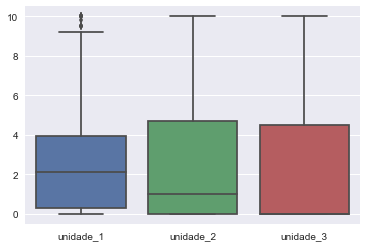

In [16]:
df = pd.DataFrame(index=range(1,len(un1)), columns = ['unidade_1', 'unidade_2', 'unidade_3'])
df['unidade_1'] = un1['nota'].reset_index()['nota']
df['unidade_2'] = un2['nota'].reset_index()['nota']
df['unidade_3'] = un3['nota'].reset_index()['nota']

sns.boxplot(data=df)
plt.show()

#### Primeira_unidade_de_FMC2

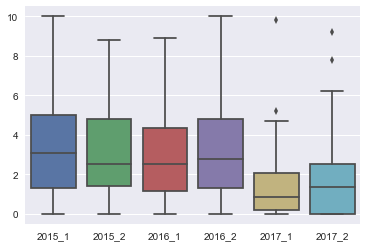

In [17]:
uni_1_2015_1 = un1[un1['ano_semestre'] == '2015_1']['nota'].reset_index()
uni_1_2015_2 = un1[un1['ano_semestre'] == '2015_2']['nota'].reset_index()
uni_1_2016_1 = un1[un1['ano_semestre'] == '2016_1']['nota'].reset_index()
uni_1_2016_2 = un1[un1['ano_semestre'] == '2016_2']['nota'].reset_index()
uni_1_2017_1 = un1[un1['ano_semestre'] == '2017_1']['nota'].reset_index()
uni_1_2017_2 = un1[un1['ano_semestre'] == '2017_2']['nota'].reset_index()

uni_1_2015_2017 = pd.DataFrame(index=range(1,len(uni_1_2015_1)), columns = ['2015_1', '2015_2', '2016_1', '2016_2', '2017_1', '2017_2'])
uni_1_2015_2017['2015_1'] = uni_1_2015_1['nota']
uni_1_2015_2017['2015_2'] = uni_1_2015_2['nota']
uni_1_2015_2017['2016_1'] = uni_1_2016_1['nota']
uni_1_2015_2017['2016_2'] = uni_1_2016_2['nota']
uni_1_2015_2017['2017_1'] = uni_1_2017_1['nota']
uni_1_2015_2017['2017_2'] = uni_1_2017_2['nota']

sns.boxplot(data=uni_1_2015_2017)
plt.show()

#### Segunda unidade de FMC2

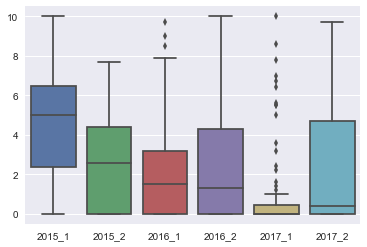

In [18]:
uni_2_2015_1 = un2[un2['ano_semestre'] == '2015_1']['nota'].reset_index()
uni_2_2015_2 = un2[un2['ano_semestre'] == '2015_2']['nota'].reset_index()
uni_2_2016_1 = un2[un2['ano_semestre'] == '2016_1']['nota'].reset_index()
uni_2_2016_2 = un2[un2['ano_semestre'] == '2016_2']['nota'].reset_index()
uni_2_2017_1 = un2[un2['ano_semestre'] == '2017_1']['nota'].reset_index()
uni_2_2017_2 = un2[un2['ano_semestre'] == '2017_2']['nota'].reset_index()

uni_2_2015_2017 = pd.DataFrame(index=range(1,len(uni_1_2015_1)), columns = ['2015_1', '2015_2', '2016_1', '2016_2', '2017_1', '2017_2'])
uni_2_2015_2017['2015_1'] = uni_2_2015_1['nota']
uni_2_2015_2017['2015_2'] = uni_2_2015_2['nota']
uni_2_2015_2017['2016_1'] = uni_2_2016_1['nota']
uni_2_2015_2017['2016_2'] = uni_2_2016_2['nota']
uni_2_2015_2017['2017_1'] = uni_2_2017_1['nota']
uni_2_2015_2017['2017_2'] = uni_2_2017_2['nota']

sns.boxplot(data=uni_2_2015_2017)
plt.show()

#### Terceira_unidade_de_FMC2

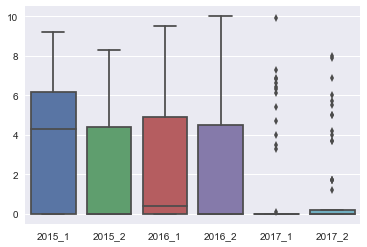

In [19]:
uni_3_2015_1 = un3[un3['ano_semestre'] == '2015_1'][['nota', 'ano_semestre']].reset_index()
uni_3_2015_2 = un3[un3['ano_semestre'] == '2015_2'][['nota', 'ano_semestre']].reset_index()
uni_3_2016_1 = un3[un3['ano_semestre'] == '2016_1'][['nota', 'ano_semestre']].reset_index()
uni_3_2016_2 = un3[un3['ano_semestre'] == '2016_2'][['nota', 'ano_semestre']].reset_index()
uni_3_2017_1 = un3[un3['ano_semestre'] == '2017_1'][['nota', 'ano_semestre']].reset_index()
uni_3_2017_2 = un3[un3['ano_semestre'] == '2017_2'][['nota', 'ano_semestre']].reset_index()

uni_3_2015_2017 = pd.DataFrame(index=range(1,len(uni_1_2015_1)), columns = ['2015_1', '2015_2', '2016_1', '2016_2', '2017_1', '2017_2'])
uni_3_2015_2017['2015_1'] = uni_3_2015_1['nota']
uni_3_2015_2017['2015_2'] = uni_3_2015_2['nota']
uni_3_2015_2017['2016_1'] = uni_3_2016_1['nota']
uni_3_2015_2017['2016_2'] = uni_3_2016_2['nota']
uni_3_2015_2017['2017_1'] = uni_3_2017_1['nota']
uni_3_2015_2017['2017_2'] = uni_3_2017_2['nota']

sns.boxplot(data=uni_3_2015_2017)
plt.show()

## Analise_dos_gráficos_obtidos_(Nalbert)

Com uma olhada no primeiro grafico [As_3_unidades_de_FMC2_com_todos_os_semestres_juntos](#As_3_unidades_de_FMC2_com_todos_os_semestres_juntos) notamos na unidade 1 50% dos alunos ficam com notas entre 0.5 e 4 com mediana igual a algo proximo de 2. O restante tira nota igual a 0 ou maior que 4 e menor que 9, tendo alguns "outlines" que ficam com nota superior a 9. Vamos para o grafico [Primeira_unidade_de_FMC2](#Primeira_unidade_de_FMC2) para ver como estão as notas de cada semestre desde 2015, para assim termos uma ideia mais historica melhor das notas da primeira unidade. No grafico da 1ª unidade vemos que nem sempre foi tão baixa a concentração dos alunos na região de notas baixas. Vemos que no inicio as notas se concentravam entre 2 e 5, mas a concentração de notas foi com o tempo descendo no grafico até que em 2017 chegou a 50% dos alunos tirarem notas entrem 0 e 2, tendo uma subida com 50% dos alunos no ultimo semestre tirando entre 0 e 3. Isso nos mostra que provavelmente apartir do primeiro semestre do ano passado algo vez a quantidade de alunos que tiram menos de 50% se concentrarem em niveis baixos. Algo pode ter acontecido com a forma de ensino, professores ou ate mesmo materiais que foi modificado e assim faz o aluno já iniciar a disciplina com nota baixa. Isso pode comprometer a qualidade nas unidades seguintes, visto que os alunos tiraram notas tão baixas provavelmente eles não absorveram bem o assunto e assim provavelmente terão uma deficuldade para entender os assuntos das unidades 2 e 3.
  
  Voltemos para o grafico [As_3_unidades_de_FMC2_com_todos_os_semestres_juntos](#As_3_unidades_de_FMC2_com_todos_os_semestres_juntos) e olhemos a segunda unidade. Podemos ver que agora 50% dos alunos tiraram notas entre 0.5 e 5, entretanto a mediana foi abaixo da mediana da unidade 1. A mediana é proximo a 1. Os Outros 50% dos alunos tiraram notas acima de 5. Agora veremos o grafico [Segunda unidade de FMC2](#Segunda unidade de FMC2) para vermos o historico das notas dos alunos na unidade 2. Vemos algo parecido com o primeiro grafico, de 2015 até 2016 os alunos tiveram concentrações de notas em diferentes partes dos graficos, com uma queda tremenda no primeiro semestre de 2017, nesse semestre 50% das notas se concentraram entre 0 e 0.5, com o resto estando concentrado entre 0.5 e 1, acima de 1 vemos que todos são "outlines", isso mostra que talvez a baixa performance dos alunos do 1º semestre foi reflexo de baixa absorção no conhecimento por algum motivo e com isso a segunda unidade teve um aproveitamento extremamente baixo. Entretanto vemos tanbém que no segundo semestre de 2017 ouve uma melhora significativa e 50% dos alunos tiraram notas entre 0 e 5 entretanto a mediana ainda continua abaixo de 1. Isso mostra que pode esta sendo feito alguma coisa para uma melhora dessas notas, talvez o fato de ter tirado notas baixas tenha feito alunos e/ou professores desse semestre terem procurado algo para melhorar a performance.
  
  Voltemos para o grafico [As_3_unidades_de_FMC2_com_todos_os_semestres_juntos](#As_3_unidades_de_FMC2_com_todos_os_semestres_juntos) e olhemos a terceira unidade. Vemos que esta igual a segunda unidade com a diferença que a mediana está quase sobre o 0. Agora vamos para o grafico [Terceira_unidade_de_FMC2](#Terceira_unidade_de_FMC2) que possui o historico da 3ª unidade de fmc2. Vemos que nos anos 205 e 2016 50% dos alunos costumavam tirar notas entre 0 e 5, mas novamente no ano de 2017 algo fez mais de 50% ficar com notas igual a 0, sendo todos os outros "outlines", no segundo semestre de 2017 ouve uma melhora leve e mais de 50% dos alunos ficaram com notas entre 0 e 0.5 e as notas acima de 0.5 são "outlines".
  
  Tentamos analizar as 3 unidades de FMC2 e está claro que desde o primeiro semestre de 2017 algo está muito errado e precisa ser mudado, pois nos anos anteriores as medias eram baixas entratanto não eram tão concentradas proximo a 0. Essa materia precisa de uma analise mais aprofundada para descobrir o problema que possui, mas obviamente o maior problema apareceu no primeiro demestre de 2017 e se continua até o resente momento o comportamento dos graficos das 3ªs unidades dos 2 semestres passados irão continuar. 